## Vision-Python Demonstration Workbook

*Objective*: To illustrate access to a vision service that delivers standard python-ready json structures with the longer-term goal of demonstrating access to client FAST environments.


### Applications

This notebook contains some basic Vision examples that illustrate access and manipulation of account data, leveraging the core classes provided in the Vision environment. The class *Account* in the Vision hierarchy is a parent class that allows Portfolios, Benchmarks, ETFs, and Custom Blends to share data structure, access, and update methodologies, so that standard transformations can be encapsulated and applied identically.  Any of these account types can be used as identifiers in the examples that follow.

The following samples are included:

| Application Name | Description |
| :-- | :-- |
| AccountHoldings | Retrieve the holdings for an account as of a specific date | 
| AllAccountSummary | Provide summary information for each account associated with a source (e.g.,SP, Russell, Portfolio)as of a specific date | 
| TopHoldingsByAccount | Retrive top n holdings for each account associated with a source |
| WhoOwns | Retrieve the accounts that include specified security as of a specific date |
| SecurityDateXTab | Security x Date cross tab for an account |
| SecurityAccountXTab | Security x Account cross tab for a set of accounts as of a date |
| AccountSecurityXTab | Account x Security cross tab for a set of securities as of a date |
| AccountGroups | Group holdings for an Account using supplied rule as of a date |
| BenchmarkMemberChanges | Adds and drops in a benchmark since a specified date |

Each of these applications is demonstrated and described in more detail later in this notebook.

#### Parameters

| **Parameter** | Definition |
| --- | --- |
| **acctId** | account identifier |
| **acctIds** | comma-separated list of account identifiers |
| **sourceId** | account id that serves a a surrogate for set of benchmarks or portfolios (e.g., r.3000 for all Russell) |
| **date** | as of date |
| **dates** | comma-sepaarted list of dates in YYYYMMDD format |
| **secId** | security identifier |
| **secIds** |commas-separate list of security identifiers|
| **groupRule** | expression that returns a value to group by |

#### Notes

* This notebook provides a number of examples that fetch data from a Vision federated database utilizing an open-source node-js package talking to vision.  This is a work-in-progress designed to demonstrate concepts.  It uses a proof-of-concept vision module known as Applay (which can mean Application Layer or Application Play Area depending on your mood) and is running against a non-production database on a vision dev host inside the FactSet firewall.  Only FactSet internals will have access to this database.  All of the components demonstrated here are designed to work with client FAST environments.

* You will need to specify the url that connects to the vision service.


### Getting Started

To begin, you will need to import the Vision Connection (vconnect) module.  __[Get the <i>vconnect</i> module here](https://github.com/LeslieNewman/Vi-Py/blob/main/py/vconnect.py)__ .  Store this file locally in your normal work area.  The examples will be using several functions from this module:

* *vc.runvision* is used to run an actual Vision query in explicit Vision syntax.  It is useful for troubleshooting.
* *vc.runapp* is used to run one of the sample applications listed above.


The examples below also use the *DataFrame* class from the *pandas* module, so you probably want to import that as well.

You will need to use the _os.environ_ function to identify the location of your Vision Server.

In [1]:
import pandas as pd
import vconnect

vc = vconnect.VCconnection()
vc.setUrl('http://visdevdb01.cts.fast-clientenv-aws.dev.us-east-1.aws.fdscloud.io:10010/vision/api')

### Waking up the Vision Service

This demo is leveraging a non-production service running on a dev box.  At any time, the service may be in one of the following states:

1. Available
1. Needing Restart
1. Dead

The following code can be run to determine which state the service is in:

>`
query = '''
SecurityMap locateId: "FDS" . profile
'''
response = vc.runvision({'expression' : query})
print (response)
`
>

If the service is **available**, you will see a report show the vendor mapping for the supplied identifier (FDS).  If the service is **needing restart**, you will get an error message that includes the text *RemoteDisconnected* after a minute or so.  If you see this message, you should run the code again which should restart the service for you.  This step may take 20 seconds or so.  If you get another error message, the service is most like **dead** and will need manual intervention on the unix account.


In [2]:
#-- wake up the Vision service

query = '''
SecurityMap locateId: "FDS" . profile
'''
response = vc.runvision({'expression' : query})
print (response)

SecurityMap entry 303075105
Aliases: CUSIP_303075105 | MSCITSCODE_TS66137 | PERMID_DJC0PL-S-US | SEDOL_2329770 | TICKERUS_FDS | 

 * FactSet   303075105    FDS          FACTSET RESEARCH SYSTEMS INC
   FundPricesDefault      Default      Default
   CSIStandar30307510     FDS          FACTSET RESEARCH SYSTEMS INC
   CSIResearcDefault      Default      Default
   Msci      TS66137      TS66137      FACTSET RESEARCH SYSTEMS
   Worldscope303075105   C    FDS        303075105  2329770   US3030751057  FACTSET RESEARCH SYSTEMS INC.
   IbesDomMM FD1          FD1          FACTSET RESEARCH SYSTEMS INC
   IbesIntMM Default      Default      Default
   SandP     30307510     FDS          FactSet Research System Inc
   Russell   30307510     FDS          FACTSET RESEARCH SYSTEMS
   Topix     Default      Default      Default
   Ftse      C69897.F     C69897.F     Factset Research Systems
   DJStoxx   SC000FDS     SC000FDS     FACTSET RESEARCH SYS.
   LocalVisioDefault      Default      Default




## The AccountHoldings Application

The **AccountHoldings** application can be used to retrieve the holdings for an account as of a specific date.

#### Input

* *acctId*
* *date*

#### Output

* id       : account id
* name     : account name
* type     : account type
* date     : input date
* currency : default currency for account
* count    : number of holdings as of date
* constituents   : array of constituents
   *   date   :  holdings date
   *   acctId :  account id
   *   secId  :  security id (factset standard)
   *   vendorId : secuirty id (vendor supplied)
   *   name   :  security name
   *   mval   :  total market value
   *   shares :  shares
   *   weight :  weight


In [3]:
#--  Create inputs and run the application - status of 0 indicates success
params = {'acctId' : "OEX", 'date' : "20171231"}
response = vc.runapp ("AccountHoldings", params)
response['status']

{'code': 0, 'message': 'Success'}

In [4]:
#--  Look at the entire response structure

response['response']

{'id': 'OEX',
 'name': 'S&P 100',
 'type': 'IndexAccount',
 'currency': 'USD',
 'date': 20171231,
 'count': 102,
 'constituents': [{'acctId': '78379010',
   'date': '29-Dec-2017',
   'secId': '00206R10',
   'vendorId': '00206R10',
   'name': 'AT&T Inc',
   'weight': 1.6550763719084531,
   'shares': 6140000000,
   'mval': 238723200000},
  {'acctId': '78379010',
   'date': '29-Dec-2017',
   'secId': '00282410',
   'vendorId': '00282410',
   'name': 'Abbott Laboratories',
   'weight': 0.6887006811584055,
   'shares': 1740601000,
   'mval': 99336099070},
  {'acctId': '78379010',
   'date': '29-Dec-2017',
   'secId': '02000210',
   'vendorId': '02000210',
   'name': 'Allstate Corp',
   'weight': 0.2604926505167856,
   'shares': 358826000,
   'mval': 37572670460},
  {'acctId': '78379010',
   'date': '29-Dec-2017',
   'secId': '02209S10',
   'vendorId': '02209S10',
   'name': 'Altria Group Inc',
   'weight': 0.9447220672503439,
   'shares': 1908190000,
   'mval': 136263847900},
  {'acctId': '

In [5]:
#--  Display in a nicer format

data = response['response']
print ("Holdings For: ", data['id'], "  ", data['name'], " since ", data['date'])
pd.DataFrame(response['response']['constituents'], columns = ["acctId", "secId", "date", "name", "mval", "weight"]).head()

Holdings For:  OEX    S&P 100  since  20171231


,acctId,secId,date,name,mval,weight
0,78379010,00206R10,29-Dec-2017,AT&T Inc,2.387232e+11,1.655076
1,78379010,00282410,29-Dec-2017,Abbott Laboratories,9.933610e+10,0.688701
2,78379010,02000210,29-Dec-2017,Allstate Corp,3.757267e+10,0.260493
3,78379010,02209S10,29-Dec-2017,Altria Group Inc,1.362638e+11,0.944722
4,78379010,02313510,29-Dec-2017,Amazon.com Inc,4.677339e+11,3.242816


## The AllAccountSummary Application

The **AllAccountSummary** application can be used to provide summary information for each account associated with a source as of a specific date

#### Input

* *sourceId*
* *date*

#### Output

* *id*             : account id
* *name*           : account name
* *date*           : input date
* *count*          : number of holdings as of date
* *tmv*            : total market value as of date
* *tmv1D*          : total market value as of prior business date
* *tmv1ME*         : total market value as of prior month-end
* *tmv1YE*         : total market value as of prior year-end



In [6]:
#--  Create inputs and run the application - status of 0 indicates success
params = {'sourceId' : "sp50", 'date' : "20191231"}
response = vc.runapp ("AllAccountSummary", params)
response['status']

{'code': 0, 'message': 'Success'}

In [7]:
#--  Look at the entire response structure

response['response']

{'accounts': [{'id': '78379010',
   'name': 'S&P 100',
   'date': '12/31/2019',
   'count': 101,
   'tmv': 17116273543509.701,
   'tmv1D': 17068503388846.8,
   'tmv1ME': 16694863815742.6,
   'tmv1YE': 13457228404096.602},
  {'id': '00000117',
   'name': 'S&P 500',
   'date': '12/31/2019',
   'count': 505,
   'tmv': 26759686786884.305,
   'tmv1D': 26681082527120.695,
   'tmv1ME': 26098053783268.31,
   'tmv1YE': 21026901634051.305},
  {'id': '00000148',
   'name': 'S&P 500 Industrials',
   'date': '12/31/2019',
   'count': 365,
   'tmv': 21112147827377.902,
   'tmv1D': 21054764837744.203,
   'tmv1ME': 20529004451150.12,
   'tmv1YE': 16468631132355.604},
  {'id': '000001EI',
   'name': 'S&P Mid Cap 400 / Citigroup Growth',
   'date': '12/31/2019',
   'count': 232,
   'tmv': 948807479341.1594,
   'tmv1D': 948778643983.7665,
   'tmv1ME': 918809693924.7148,
   'tmv1YE': 765972377314.3127},
  {'id': '000001EO',
   'name': 'S&P Mid Cap 400 / Citigroup Value',
   'date': '12/31/2019',
   'count

In [8]:
#--  Display in a nicer format

data = response['response']['accounts']
pd.DataFrame(data, columns = ["id", "name", "date", "count", "tmv", "tmv1ME"]).head()

,id,name,date,count,tmv,tmv1ME
0,78379010,S&P 100,12/31/2019,101,1.711627e+13,1.669486e+13
1,00000117,S&P 500,12/31/2019,505,2.675969e+13,2.609805e+13
2,00000148,S&P 500 Industrials,12/31/2019,365,2.111215e+13,2.052900e+13
3,000001EI,S&P Mid Cap 400 / Citigroup Growth,12/31/2019,232,9.488075e+11,9.188097e+11
4,000001EO,S&P Mid Cap 400 / Citigroup Value,12/31/2019,297,8.799573e+11,8.865968e+11


## The TopHoldingsByAccount Application

The **TopHoldingsByAccount** application can be used to retrieve the top 'n' holdings for each account associated with a source asof a specific date


#### Input

* *sourceId*
* *date*
* *n*        : number of holdings to display (defaults to 5)


#### Output

* *acctId*          : account id
* *secId*           : security id
* *date*            : holdings date
* *position*        : 1 - n
* *weight*          : weight of security in account


In [9]:
#--  Create inputs and run the application - status of 0 indicates success
params = {'sourceId' : "sp50", 'date' : "20191231", 'n' : "3"}
response = vc.runapp ("TopHoldingsByAccount", params)
response['status']

{'code': 0, 'message': 'Success'}

In [10]:
#--  Look at the entire response structure

response['response']

{'data': [{'acctId': '00000117',
   'secId': '03783310',
   'date': '12/31/2019',
   'position': 1,
   'weight': 4.583308059555214},
  {'acctId': '00000117',
   'secId': '59491810',
   'date': '12/31/2019',
   'position': 2,
   'weight': 4.49580264440784},
  {'acctId': '00000117',
   'secId': '02313510',
   'date': '12/31/2019',
   'position': 3,
   'weight': 2.875851911317542},
  {'acctId': '00000148',
   'secId': '03783310',
   'date': '12/31/2019',
   'position': 1,
   'weight': 5.809351522371028},
  {'acctId': '00000148',
   'secId': '59491810',
   'date': '12/31/2019',
   'position': 2,
   'weight': 5.698438245302011},
  {'acctId': '00000148',
   'secId': '02313510',
   'date': '12/31/2019',
   'position': 3,
   'weight': 3.6451476667155345},
  {'acctId': '000001EI',
   'secId': '87936010',
   'date': '12/31/2019',
   'position': 1,
   'weight': 1.3320208867636556},
  {'acctId': '000001EI',
   'secId': '25754A20',
   'date': '12/31/2019',
   'position': 2,
   'weight': 1.266389890

In [11]:
#--  Display in a nicer format

data = response['response']['data']
pd.DataFrame(data, columns = ["acctId", "secId", "date", "position", "weight"]).head(n=20)

,acctId,secId,date,position,weight
0,00000117,03783310,12/31/2019,1,4.583308
1,00000117,59491810,12/31/2019,2,4.495803
2,00000117,02313510,12/31/2019,3,2.875852
3,00000148,03783310,12/31/2019,1,5.809352
4,00000148,59491810,12/31/2019,2,5.698438
5,00000148,02313510,12/31/2019,3,3.645148
6,000001EI,87936010,12/31/2019,1,1.332021
7,000001EI,25754A20,12/31/2019,2,1.266390
8,000001EI,90225210,12/31/2019,3,1.232766
9,000001EO,58463J30,12/31/2019,1,1.241328


## The WhoOwns Application

The **WhoOwns** application can be used to retrievethe Benchmarks or Portfolios from a specified source that include supplied security

#### Input

* *sourceId* : id of Account to use as surrogate for family
* *secId*    : id of Security
* *date*     : as of date of Holdings
 
#### Output

*  *id*             : security id
*  *name*           : security name
*  *constituents*   : array of holdings
   * *date*          : holdings date
   * *acctId*        : account id
   * *name*          : account name
   * *secId*         : security id
   * *mval*          : market value of security in account
   * *shares*        : shares of security in account
   * *weight*        : weight of security in account
   


In [12]:
#--  Create inputs and run the application - status of 0 indicates success
params = {'sourceId' : "sp50", 'secId' : 'ibm'}
response = vc.runapp ("WhoOwns", params)
response['status']

{'code': 0, 'message': 'Success'}

In [13]:
#--  Look at the entire response structure

response['response']

{'id': 'IBM',
 'name': 'Intl Business Machines Corp',
 'constituents': [{'acctId': '000005LV',
   'date': '23-Dec-2020',
   'secId': '45920010',
   'name': 'S&P 900',
   'weight': 0.3329749177136336,
   'shares': 891057000,
   'mval': 110401962300},
  {'acctId': '00000148',
   'date': '23-Dec-2020',
   'secId': '45920010',
   'name': 'S&P 500 Industrials',
   'weight': 0.43038019696324664,
   'shares': 891057000,
   'mval': 110401962300},
  {'acctId': '99900721',
   'date': '23-Dec-2020',
   'secId': '45920010',
   'name': 'S&P 500 / IT Consulting & Other Services -SUB',
   'weight': 31.485143574963292,
   'shares': 891057000,
   'mval': 110401962300},
  {'acctId': '99900723',
   'date': '23-Dec-2020',
   'secId': '45920010',
   'name': 'S&P Composite 1500 / IT Consulting & Other Services -SUB',
   'weight': 28.955953318817365,
   'shares': 891057000,
   'mval': 110401962300},
  {'acctId': '00000117',
   'date': '23-Dec-2020',
   'secId': '45920010',
   'name': 'S&P 500',
   'weight': 

In [14]:
#--  Display in a nicer format
print ("who owns ", response['response']['name'])
data = response['response']['constituents']
pd.DataFrame(data, columns = ["acctId", "name", "date", "mval", "shares", "weight"]).head()

who owns  Intl Business Machines Corp


,acctId,name,date,mval,shares,weight
0,000005LV,S&P 900,23-Dec-2020,110401962300,891057000,0.332975
1,00000148,S&P 500 Industrials,23-Dec-2020,110401962300,891057000,0.430380
2,99900721,S&P 500 / IT Consulting & Other Services -SUB,23-Dec-2020,110401962300,891057000,31.485144
3,99900723,S&P Composite 1500 / IT Consulting & Other Ser...,23-Dec-2020,110401962300,891057000,28.955953
4,00000117,S&P 500,23-Dec-2020,110401962300,891057000,0.354992


## The SecurityDateXTab Application

The **SecurityDateXTab** application presents a crosstab of security x different time points for a single account,
       aligning securities over time within a portfolio or benchmark


#### Input

* *acctId*   : account id
* *dates*    : comma separated list of dates in YYYYMMDD format (default is current, -1me, -3me, -1ye)



#### Output

* *acctId*          : id for supplied account
* *name*            : account name
* *date1...dateN*   : values for each request date
* *data*           : vector of security x date weights
   * *secId*           : security id
   * *name*            : security name
   * *date1...dateN*   : weight in security on each supplied date


In [15]:
#--  Create inputs and run the application - status of 0 indicates success
params = {'acctId' : "sp50", 'dates' : "today,20200131,20191231"}
response = vc.runapp ("SecurityDateXTab", params)
response['status']

{'code': 0, 'message': 'Success'}

In [16]:
#--  Look at the entire response structure

response['response']

{'acctId': '00000117',
 'name': 'S&P 500',
 'data': [{'secId': '00105510',
   'name': 'AFLAC Inc',
   'date1': 0.1451046587698907,
   'date2': 0.14163216243691437,
   'date3': 0.09143772314083022},
  {'secId': '00130H10',
   'name': 'AES Corp',
   'date1': 0.0493707972190292,
   'date2': 0.049332755999495444,
   'date3': 0.050237922133249034},
  {'secId': '74340W10',
   'name': 'ProLogis Inc',
   'date1': 0.21044348227424367,
   'date2': 0.21954529127834238,
   'date3': 0.22863718148738624},
  {'secId': '00206R10',
   'name': 'AT&T Inc',
   'date1': 1.0668263880424853,
   'date2': 1.0282460646189877,
   'date3': 0.6587568270819664},
  {'secId': '00282410',
   'name': 'Abbott Laboratories',
   'date1': 0.5736845558119265,
   'date2': 0.5762487009268522,
   'date3': 0.6123508315385991},
  {'secId': '00507V10',
   'name': 'Activision Blizzard Inc',
   'date1': 0.17059246456641783,
   'date2': 0.1681022902660841,
   'date3': 0.22417918692357713},
  {'secId': '00724F10',
   'name': 'Adobe I

In [17]:
#--  Display in a nicer format

data = response['response']
print ("Security XTab for ", data['acctId'], data['name'])
print ( "date1 -", data['date1'], " date2 - ", data['date2'], "date3 -", data['date3'] )

pd.DataFrame(data['data'], columns = ["secId","name","date1","date2","date3"]).head(n=10)


Security XTab for  00000117 S&P 500
date1 - 20191231  date2 -  20200131 date3 - 20201223


,secId,name,date1,date2,date3
0,00105510,AFLAC Inc,0.145105,0.141632,0.0914377
1,00130H10,AES Corp,0.0493708,0.0493328,0.0502379
2,74340W10,ProLogis Inc,0.210443,0.219545,0.228637
3,00206R10,AT&T Inc,1.06683,1.02825,0.658757
4,00282410,Abbott Laboratories,0.573685,0.576249,0.612351
5,00507V10,Activision Blizzard Inc,0.170592,0.168102,0.224179
6,00724F10,Adobe Inc.,0.596622,0.635996,0.766489
7,00751Y10,Advance Auto Parts Inc,0.0414524,0.0341417,0.0347546
8,00790310,Advanced Micro Devices,0.19085,0.195838,0.354047
9,00846U10,Agilent Technologies Inc,0.0986585,0.0955968,0.115415


## The SecurityAccountXTab Application

The **SecurityAccountXTab** application presents a crosstab of securities for a set of accounts as of a specific date

#### Input

* *acctIds*   : comma separated list of account ids
* *date*      : as of date

#### Output

* *acct1...acctN*  : acct id value for each account requested
* *data*           : vector of security x account weights
   * *secId*           : security id
   * *name*            : security name
   * *acct1...acctN*   : weight in security for account
 



In [18]:
#--  Create inputs and run the application - status of 0 indicates success
params = {'acctIds' : "sp50,sml,spii"}
response = vc.runapp ("SecurityAccountXTab", params)
response['status']

{'code': 0, 'message': 'Success'}

In [19]:
#--  Look at the entire response structure

response['response']

{'data': [{'secId': '000360206',
   'name': 'AAON INC',
   'acct3': 0.30322871688004005,
   'acct1': 'visionNA',
   'acct2': 'visionNA'},
  {'secId': '000361105',
   'name': 'AAR CORP',
   'acct3': 0.13616838144750493,
   'acct1': 'visionNA',
   'acct2': 'visionNA'},
  {'secId': '03076K108',
   'name': 'AMERIS BANCORP',
   'acct3': 0.29761091579250576,
   'acct1': 'visionNA',
   'acct2': 'visionNA'},
  {'secId': '000957100',
   'name': 'ABM INDUSTRIES INC',
   'acct3': 0.2907008314589255,
   'acct1': 'visionNA',
   'acct2': 'visionNA'},
  {'secId': '001055102',
   'name': 'AFLAC INC',
   'acct1': 0.09143772314083022,
   'acct2': 'visionNA',
   'acct3': 'visionNA'},
  {'secId': '00130H105',
   'name': 'AES CORP (THE)',
   'acct1': 0.050237922133249034,
   'acct2': 'visionNA',
   'acct3': 'visionNA'},
  {'secId': '74340W103',
   'name': 'PROLOGIS INC',
   'acct1': 0.22863718148738624,
   'acct2': 'visionNA',
   'acct3': 'visionNA'},
  {'secId': '002474104',
   'name': 'AZZ INC',
   'acct

## The AccountSecurityXTab Application

The **AccountSecurityXTab** application presents a crosstab of accounts for a set of securities as of a specific date

#### Input

* *sourceId*   : id of Account to use as surrogate for family
* *secIds*   : comma separated list of security ids
* *date*      : as of date

#### Output

* *sec1...secN*    : ids for each security in xtab
* *data*             : array of accounts showing weight in each security
   * *acctId*  :  account id
   * *name*      : account name
   * *date*    :  holdings date
   * *sec1 ...secN*  : weight for each security in account
 

In [12]:
#--  Create inputs and run the application - status of 0 indicates success
params = {'sourceId' : 'sp50', "secIds" : "ibm,msft,fds"}
response = vc.runapp ("AccountSecurityXTab", params)
response['status']

{'code': 0, 'message': 'Success'}

In [13]:
#--  Look at the entire response structure

response['response']

{'data': [{'acctId': '78379010',
   'name': 'S&P 100',
   'sec2': 0.5419223176173713,
   'sec3': 7.777637722947592,
   'sec1': 'visionNA'},
  {'acctId': '00000117',
   'name': 'S&P 500',
   'sec2': 0.3575778912377156,
   'sec3': 5.131937189835638,
   'sec1': 'visionNA'},
  {'acctId': '00000148',
   'name': 'S&P 500 Industrials',
   'sec2': 0.43479228901842976,
   'sec3': 6.240113755758105,
   'sec1': 'visionNA'},
  {'acctId': '000001EI',
   'name': 'S&P Mid Cap 400 / Citigroup Growth',
   'sec1': 1.1574885417342013,
   'sec2': 'visionNA',
   'sec3': 'visionNA'},
  {'acctId': '000002IQ',
   'name': 'S&P 1000',
   'sec1': 0.41190745961611125,
   'sec2': 'visionNA',
   'sec3': 'visionNA'},
  {'acctId': '000005LV',
   'name': 'S&P 900',
   'sec1': 0.03692736225701894,
   'sec2': 0.33517378858178704,
   'sec3': 4.810394805806029},
  {'acctId': '03113H10',
   'name': 'S&P Mid Cap 400',
   'sec1': 0.5893745680254591,
   'sec2': 'visionNA',
   'sec3': 'visionNA'},
  {'acctId': '78384210',
   '

## The AccountGroups Application

The **AccountGroups** groups holdings for an Account using supplied rule as of a date

#### Input

* *acctId*   : account id
* *date*      : as of date
* *groupRule*  : expression that represents a rule to group holdings by

#### Output

* *id*      : account id
* *name*    : account name
* *type*    : account type
* *date*    : input date
* *count*   : number of total holdings on date
* *groups*  : array of groups showing weight in each group
* *data*    : array of accounts showing weight in each security
   * *groupId*  : group id
   * *groupName*  : group name
   * *weight* : weight of group
   * *count" : number of holdings in group



{'appName': 'AccountGroups', 'status': {'code': 0, 'message': 'Success'}, 'response': {'id': 'MS144845', 'name': 'MSCI AC World + Frontier Markets All Cap', 'type': 'IndexAccount', 'date': 20210203, 'count': 15170, 'groups': [{'groupId': 'Default', 'groupName': 'Default', 'weight': 0.000789588391517384, 'count': 7}, {'groupId': '10', 'groupName': 'Energy', 'weight': 2.996364612439041, 'count': 560}, {'groupId': '15', 'groupName': 'Materials', 'weight': 5.222824942019228, 'count': 1342}, {'groupId': '20', 'groupName': 'Industrials', 'weight': 10.589107119406027, 'count': 2626}, {'groupId': '25', 'groupName': 'Consumer Discretionary', 'weight': 13.320408933790297, 'count': 2059}, {'groupId': '30', 'groupName': 'Consumer Staples', 'weight': 6.671464671046975, 'count': 912}, {'groupId': '35', 'groupName': 'Health Care', 'weight': 11.929378499487969, 'count': 1706}, {'groupId': '40', 'groupName': 'Financials', 'weight': 13.198548977126569, 'count': 1870}, {'groupId': '45', 'groupName': 'Inf

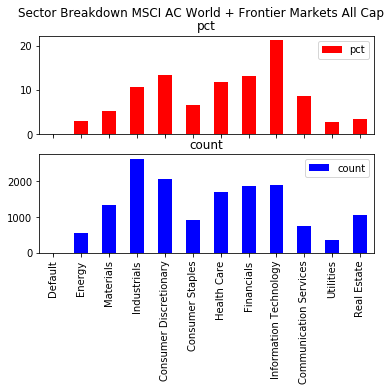

In [10]:
#-- Run application to return holdings grouped by sector and chart the result

#result = vc.runapp("AccountGroups", {'acctId' : 'sp50', 'groupRule' : 'mapEntry cp fs gicSector'})
result = vc.runapp("AccountGroups", {'acctId' : 'MS144845', 'groupRule' : 'mapEntry cp fs gicSector'})
print(result)

groups = result['response']['groups']
labels = [x['groupName'] for x in groups]
weights = [x['weight'] for x in groups ] 
counts = [x['count'] for x in groups]
title = "Sector Breakdown " + result['response']['name']

df = pd.DataFrame({'pct': weights, 'count' : counts}, index=labels)
myplot = df.plot.bar(rot=90, title= title, subplots=True, color=['red','blue'])

## The BenchmarkMemberChanges Application

The **BenchmarkMemberChanges** application presents the adds and drops in a benchmark since a specified date

#### Input

* *acctId*   : id of Benchmark
* *date*      : start date for adds/drops

#### Output

* *id*   : id of benchmark
* *name* : name of benchmark
* *baseDate* : initial date of changes
* *changes*   : array of change records 
   * *date*   : date of change
   * *status* : initial, add, or drop
   * *secId*  : security id




In [10]:
#--  Create inputs and run the application - status of 0 indicates success
params = {'acctId' : 'sp50'}
response = vc.runapp ("BenchmarkMemberChanges", params)
response['status']

{'code': 0, 'message': 'Success'}

In [11]:
#--  Look at the entire response structure

response['response']

{'id': 'SP50',
 'name': 'S&P 500',
 'baseDate': 19900102,
 'changes': [{'date': 19900102, 'status': 'initial', 'secId': '88579Y10'},
  {'date': 19900102, 'status': 'initial', 'secId': '00176510'},
  {'date': 19900102, 'status': 'initial', 'secId': '00195750'},
  {'date': 19900102, 'status': 'initial', 'secId': '00462610'},
  {'date': 19900102, 'status': 'initial', 'secId': '00786910'},
  {'date': 19900102, 'status': 'initial', 'secId': '00867710'},
  {'date': 19900102, 'status': 'initial', 'secId': '01310410'},
  {'date': 19900102, 'status': 'initial', 'secId': '01371610'},
  {'date': 19900102, 'status': 'initial', 'secId': '01447610'},
  {'date': 19900102, 'status': 'initial', 'secId': '02312710'},
  {'date': 19900102, 'status': 'initial', 'secId': '02390510'},
  {'date': 19900102, 'status': 'initial', 'secId': '02532110'},
  {'date': 19900102, 'status': 'initial', 'secId': '02635110'},
  {'date': 19900102, 'status': 'initial', 'secId': '03009610'},
  {'date': 19900102, 'status': 'ini